In [149]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Puxa o csv do usuario e trata as colunas
def pushUserData(user_name):
    df = pd.read_csv(f'participantes/dados/total/{user_name}.csv')
    df['data'] = pd.to_datetime(df['data'])
    df['dia'] = df['dia'].astype(str)
    df['seguidores'] = pd.to_numeric(df['seguidores'])
    df['seguindo'] = pd.to_numeric(df['seguindo'])
    df['posts'] = pd.to_numeric(df['posts'])
    return df

# Cria as colunas com as diferenças e a aceleração de seguidores, seguindo e posts
def createAuxCols(data):
    data['dif_seguidores'] = data['seguidores'].diff()
    data['acl_seguidores'] = data['dif_seguidores'].diff()
    data['dif_seguindo'] = data['seguindo'].diff()
    data['acl_seguindo'] = data['dif_seguindo'].diff()
    data['dif_posts'] = data['posts'].diff()
    data['dif_seguidores'] = pd.to_numeric(data['dif_seguidores'])
    data['acl_seguidores'] = pd.to_numeric(data['acl_seguidores'])
    data['dif_seguindo'] = pd.to_numeric(data['dif_seguindo'])
    data['acl_seguindo'] = pd.to_numeric(data['acl_seguindo'])
    data['dif_posts'] = pd.to_numeric(data['dif_posts'])
    n_dia = np.arange(0, data['dia'].shape[0]) + 1
    data['n_dia'] = n_dia
    data = data.fillna(0)
    return data


# Plota um lineplot único
def plot_line(title, data, x, y, xlabel, ylabel):
    sns.set_style('whitegrid')
    ax = sns.lineplot(x = x , y = y, data = data, linewidth = 5 )
    ax.figure.set_size_inches(15,7)
    ax.set_title(title, loc= 'center', fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

def compare_plot(data, user):

    plt.figure(figsize = (17, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(f'Análise dos seguidores de @{user}', fontsize = 18, loc = 'center')
    
    sns.set_style('whitegrid')
    g1 = sns.lineplot(x = 'data' , y = 'seguidores', data = data, linewidth = 5)
    g1.figure.set_size_inches(15,17)
    g1.set_xlabel('Tempo', fontsize=14)
    g1.set_ylabel('Seguidores (Milhões)', fontsize=14)

    ax2 = plt.subplot(3, 1, 2)
    
    g2 = sns.lineplot(x = 'data' , y = 'dif_seguidores', data = data, linewidth = 5)
    g2.figure.set_size_inches(15,17)
    g2.set_xlabel('Tempo', fontsize=14)
    g2.set_ylabel('Ganho/Perda Diário', fontsize=14)

    ax3 = plt.subplot(3, 1, 3)
    
    g3 = sns.lineplot(x = 'data' , y = 'acl_seguidores', data = data, linewidth = 5)
    g3.figure.set_size_inches(15,17)
    g3.set_xlabel('Tempo', fontsize=14)
    g3.set_ylabel('Aceleração', fontsize=14)
    
    plt.savefig(f'participantes/graficos/comparacao/comparacao_{user}.png')
    plt.close()


# Gera gráfico da média de perda por dia da semana  
def plot_mean_loss_by_day(data, user):
    aux_col = []
    for item in data['dif_seguidores']:
        if item != 0:
            aux_col.append(item * (-1))
        else:
            aux_col.append(item)
    data['dif_seguidores_aux'] = aux_col
    mean_lost_per_day = data.groupby(['dia']).mean()['dif_seguidores_aux'].astype(int).to_frame()
    mean_lost_per_day['dia'] = mean_lost_per_day.index
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    re_arange = [mean_lost_per_day.iloc[0],
                 mean_lost_per_day.iloc[4],
                 mean_lost_per_day.iloc[6],
                 mean_lost_per_day.iloc[1],
                 mean_lost_per_day.iloc[2],
                 mean_lost_per_day.iloc[5],
                 mean_lost_per_day.iloc[3]]

    mean_lost_per_day = pd.concat(re_arange, axis = 1).T
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    
    plt.figure(figsize = (17, 12))
    g1 = sns.barplot(x = 'dia', y = 'dif_seguidores_aux', data = mean_lost_per_day)
    g1.set_title(f'Média de Seguidores Ganhos/Perdidos de @{user} p/ Dia da Semana', fontsize = 18, loc = 'center')
    g1.figure.set_size_inches(15,7)
    g1.set_xlabel('Dia da Semana', fontsize=14)
    g1.set_ylabel('Média de Ganho/Perda', fontsize=14)
    del data['dif_seguidores_aux']
    plt.savefig(f'participantes/graficos/perda_dia_da_semana/dia_da_semana_{user}.png')
    plt.close()
    
    

# Gera um gráfico para cara um nas suas respectivas pastas

def generate_all_compare(file_name):
    file = open('participantes/usuarios/' + file_name + '.txt')
    user_list = file.read().split()
    for user in user_list:
        data = pushUserData(user)
        data = createAuxCols(data)
        compare_plot(data, user)
    file.close()
    
def generate_all_weekday(file_name):
    file = open('participantes/usuarios/' + file_name + '.txt')
    user_list = file.read().split()
    for user in user_list:
        data = pushUserData(user)
        data = createAuxCols(data)
        plot_mean_loss_by_day(data, user)
    file.close()


generate_all_compare('nomes')
generate_all_weekday('nomes')

No handles with labels found to put in legend.


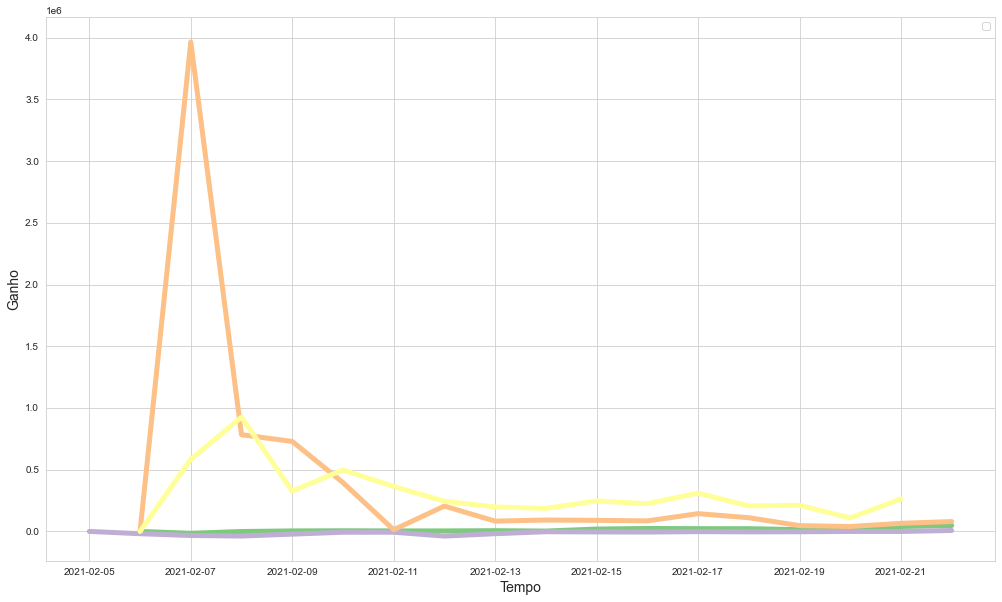

In [578]:


df1 = pushUserData('fiuk')
df1 = createAuxCols(df1)   
plt.figure(figsize = (17, 10))


g1 = sns.lineplot(x = 'data', y = 'dif_seguidores', data = df1, linewidth = 5)


df2 = pushUserData('karolconka')
df2 = createAuxCols(df2)
sns.lineplot(x = 'data', y = 'dif_seguidores', data = df2, linewidth = 5)

df3 = pushUserData('lucaskokapenteado')
df3 = createAuxCols(df3)
sns.lineplot(x = 'data', y = 'dif_seguidores', data = df3, linewidth = 5)


df4 = pushUserData('juliette.freire')
df4 = createAuxCols(df4)
g3 = sns.lineplot(x = 'data' , y = 'dif_seguidores', data = df4, linewidth = 5)

g3.set_xlabel('Tempo', fontsize=14)
g3.set_ylabel('Ganho', fontsize=14)

plt.legend()

In [150]:




def generate_follower_gain(file_name):
    file = open('participantes/usuarios/' + file_name + '.txt')
    user_list = file.read().split()
    df_data = pushUserData('fiuk')
    df_base = df_data['data'].to_frame()
    for user in user_list:
        df = pushUserData(user)
        df = createAuxCols(df)  
        df = df['dif_seguidores'].to_frame()
        df['dif_'+user] = df['dif_seguidores']
        df = df.drop('dif_seguidores', axis = 1)
        df_base = pd.concat([df_base, df], axis = 1)
    file.close()
    df_base = df_base.drop([0])
    return df_base


    
df = generate_follower_gain('nomes')

df
# user = 'fiuk'
# df = pushUserData(user)
# df = createAuxCols(df)  
# df = df['dif_seguidores'].to_frame()
# df['dif_'+user] = df['dif_seguidores']
# df = df.drop('dif_seguidores', axis = 1)
# df_base = pd.concat([df_base, df], axis = 1)

# df_base





,data,dif_kercardoso,dif_juliette.freire,dif_arthurpicoli,dif_afiune_caio,dif_joaolpedrosa,dif_bilaraujjo,dif_carladiaz,dif_karolconka,dif_camilladelucas,...,dif_negodioficial,dif_lucaskokapenteado,dif_irodolffo,dif_lumena.aleluia,dif_gilnogueiraofc,dif_viihtube,dif_sarah_andrade,dif_projota,dif_fiuk,dif_thaisfbraz
1,2021-02-07,54000.0,584522.0,38660.0,37904.0,3376.0,66276.0,219397.0,-18687.0,1019.0,...,-21360.0,3965212.0,18724.0,-3145.0,256667.0,-6860.0,303329.0,-78285.0,-15217.0,43591.0
2,2021-02-08,32094.0,925756.0,16108.0,124019.0,3967.0,123896.0,12360.0,-32999.0,20501.0,...,-13379.0,783203.0,15542.0,-9458.0,1328463.0,-4329.0,435549.0,-84406.0,-896.0,3318.0
3,2021-02-09,25993.0,326898.0,71789.0,41317.0,9095.0,116774.0,127232.0,-37548.0,4532.0,...,-2067.0,729157.0,26523.0,1178.0,215024.0,22218.0,736957.0,-154928.0,4024.0,22087.0
4,2021-02-10,34147.0,497643.0,-42871.0,36704.0,18107.0,871191.0,143410.0,-6693.0,-8183.0,...,-16509.0,395601.0,47795.0,11919.0,784796.0,30127.0,494134.0,-61163.0,5324.0,28967.0
5,2021-02-11,16432.0,363954.0,52283.0,72937.0,16157.0,1213052.0,129208.0,-6517.0,38903.0,...,-14556.0,13308.0,70455.0,622.0,316508.0,27358.0,512678.0,-29795.0,4077.0,26218.0
6,2021-02-12,7907.0,244587.0,42663.0,72002.0,6948.0,997923.0,122787.0,-37887.0,56624.0,...,-2434.0,205187.0,20037.0,-2357.0,197191.0,47788.0,251137.0,-35765.0,3975.0,18545.0
7,2021-02-13,6377.0,198618.0,10032.0,72349.0,5740.0,206955.0,86489.0,-18601.0,33145.0,...,-3157.0,83361.0,32760.0,-4278.0,159190.0,31050.0,198197.0,-10674.0,5950.0,15250.0
8,2021-02-14,3567.0,186091.0,2460.0,39936.0,13904.0,125033.0,66692.0,-2579.0,82828.0,...,-10300.0,92263.0,19072.0,-2543.0,152636.0,21991.0,181962.0,-8572.0,2840.0,10657.0
9,2021-02-15,52577.0,247094.0,10755.0,114162.0,12992.0,123385.0,76961.0,-4199.0,29096.0,...,-18559.0,89739.0,33945.0,-1273.0,131954.0,21923.0,210793.0,-16805.0,18946.0,14997.0
10,2021-02-16,24887.0,224628.0,13440.0,48607.0,14034.0,112694.0,77141.0,-5198.0,28746.0,...,-8219.0,85172.0,20005.0,-819.0,32740.0,20105.0,275042.0,-11531.0,23793.0,23609.0


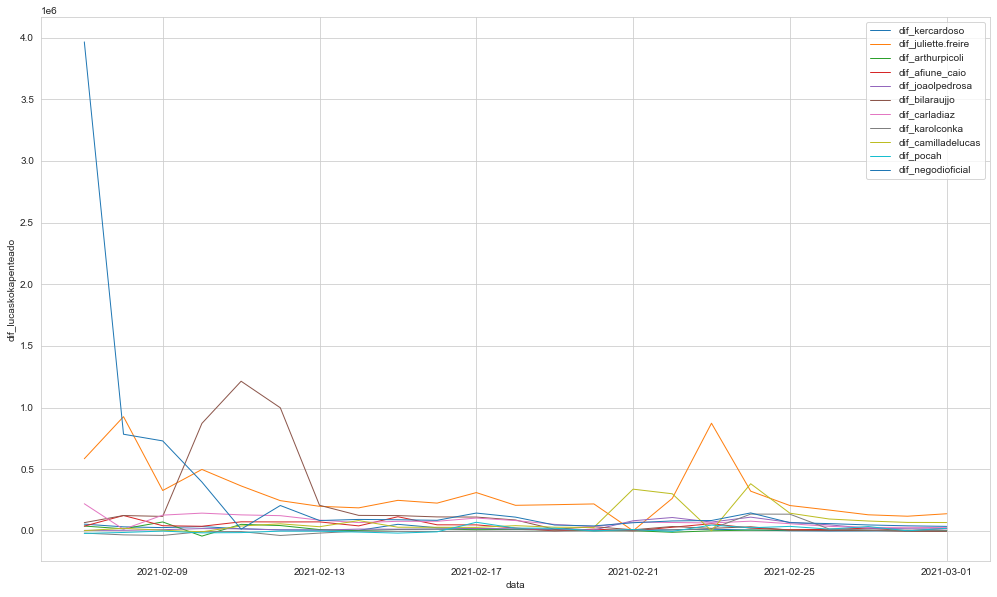

In [145]:


 
plt.figure(figsize = (17, 10))

g1 = sns.lineplot(x = 'data', y = 'dif_kercardoso', data = df, linewidth = 1)

sns.lineplot(x = 'data', y = 'dif_juliette.freire', data = df, linewidth = 1)

sns.lineplot(x = 'data', y = 'dif_arthurpicoli', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_afiune_caio', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_joaolpedrosa', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_bilaraujjo', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_carladiaz', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_karolconka', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_camilladelucas', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_negodioficial', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_lucaskokapenteado', data = df, linewidth = 1)


plt.legend(df.drop(['data'], axis = 1))

In [57]:
df

,data,dif_kercardoso,dif_juliette.freire,dif_arthurpicoli,dif_afiune_caio,dif_joaolpedrosa,dif_bilaraujjo,dif_carladiaz,dif_karolconka,dif_camilladelucas,...,dif_negodioficial,dif_lucaskokapenteado,dif_irodolffo,dif_lumena.aleluia,dif_gilnogueiraofc,dif_viihtube,dif_sarah_andrade,dif_projota,dif_fiuk,dif_thaisfbraz
1,2021-02-07,54000.0,584522.0,38660.0,37904.0,3376.0,66276.0,219397.0,-18687.0,1019.0,...,-21360.0,3965212.0,18724.0,-3145.0,256667.0,-6860.0,303329.0,-78285.0,-15217.0,43591.0
2,2021-02-08,32094.0,925756.0,16108.0,124019.0,3967.0,123896.0,12360.0,-32999.0,20501.0,...,-13379.0,783203.0,15542.0,-9458.0,1328463.0,-4329.0,435549.0,-84406.0,-896.0,3318.0
3,2021-02-09,25993.0,326898.0,71789.0,41317.0,9095.0,116774.0,127232.0,-37548.0,4532.0,...,-2067.0,729157.0,26523.0,1178.0,215024.0,22218.0,736957.0,-154928.0,4024.0,22087.0
4,2021-02-10,34147.0,497643.0,-42871.0,36704.0,18107.0,871191.0,143410.0,-6693.0,-8183.0,...,-16509.0,395601.0,47795.0,11919.0,784796.0,30127.0,494134.0,-61163.0,5324.0,28967.0
5,2021-02-11,16432.0,363954.0,52283.0,72937.0,16157.0,1213052.0,129208.0,-6517.0,38903.0,...,-14556.0,13308.0,70455.0,622.0,316508.0,27358.0,512678.0,-29795.0,4077.0,26218.0
6,2021-02-12,7907.0,244587.0,42663.0,72002.0,6948.0,997923.0,122787.0,-37887.0,56624.0,...,-2434.0,205187.0,20037.0,-2357.0,197191.0,47788.0,251137.0,-35765.0,3975.0,18545.0
7,2021-02-13,6377.0,198618.0,10032.0,72349.0,5740.0,206955.0,86489.0,-18601.0,33145.0,...,-3157.0,83361.0,32760.0,-4278.0,159190.0,31050.0,198197.0,-10674.0,5950.0,15250.0
8,2021-02-14,3567.0,186091.0,2460.0,39936.0,13904.0,125033.0,66692.0,-2579.0,82828.0,...,-10300.0,92263.0,19072.0,-2543.0,152636.0,21991.0,181962.0,-8572.0,2840.0,10657.0
9,2021-02-15,52577.0,247094.0,10755.0,114162.0,12992.0,123385.0,76961.0,-4199.0,29096.0,...,-18559.0,89739.0,33945.0,-1273.0,131954.0,21923.0,210793.0,-16805.0,18946.0,14997.0
10,2021-02-16,24887.0,224628.0,13440.0,48607.0,14034.0,112694.0,77141.0,-5198.0,28746.0,...,-8219.0,85172.0,20005.0,-819.0,32740.0,20105.0,275042.0,-11531.0,23793.0,23609.0


In [146]:
df = generate_follower_gain('nomes')
serie_datas = df['data']
df = df.drop('data', axis = 1)
from sklearn.preprocessing import MaxAbsScaler
p = MaxAbsScaler()
p.fit(df)
new_df = p.transform(df)

df_norm = pd.DataFrame(data = new_df, columns = ['dif_kercardoso', 'dif_juliette.freire', 'dif_arthurpicoli',
       'dif_afiune_caio', 'dif_joaolpedrosa', 'dif_bilaraujjo',
       'dif_carladiaz', 'dif_karolconka', 'dif_camilladelucas', 'dif_pocah',
       'dif_negodioficial', 'dif_lucaskokapenteado', 'dif_irodolffo',
       'dif_lumena.aleluia', 'dif_gilnogueiraofc', 'dif_viihtube',
       'dif_sarah_andrade', 'dif_projota', 'dif_fiuk', 'dif_thaisfbraz'] )

df_datas = serie_datas.to_frame()
new_index = list(range(0,20))
df_datas[''] = new_index
df_datas = df_datas.set_index('')


ValueError: Length of values (20) does not match length of index (23)

In [134]:
df = pd.concat([df_datas, df_norm], axis = 1)

In [147]:
plt.figure(figsize = (17, 10))

g1 = sns.lineplot(x = 'data', y = 'dif_kercardoso', data = df, linewidth = 2)

sns.lineplot(x = 'data', y = 'dif_juliette.freire', data = df, linewidth = 2)

sns.lineplot(x = 'data', y = 'dif_arthurpicoli', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_afiune_caio', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_joaolpedrosa', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_bilaraujjo', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_carladiaz', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_karolconka', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_camilladelucas', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_negodioficial', data = df, linewidth = 2)

sns.lineplot(x = 'data' , y = 'dif_lucaskokapenteado', data = df, linewidth = 2)

plt.legend(df.drop(['data'], axis = 1))

ValueError: Could not interpret input 'data'

<Figure size 1224x720 with 0 Axes>

In [53]:

datas = df['data']

TypeError: invalid type promotion

In [47]:
df = pd.DataFrame(data = new_df, columns = ['dif_kercardoso', 'dif_juliette.freire', 'dif_arthurpicoli',
       'dif_afiune_caio', 'dif_joaolpedrosa', 'dif_bilaraujjo',
       'dif_carladiaz', 'dif_karolconka', 'dif_camilladelucas', 'dif_pocah',
       'dif_negodioficial', 'dif_lucaskokapenteado', 'dif_irodolffo',
       'dif_lumena.aleluia', 'dif_gilnogueiraofc', 'dif_viihtube',
       'dif_sarah_andrade', 'dif_projota', 'dif_fiuk', 'dif_thaisfbraz'] )

In [48]:
plt.figure(figsize = (17, 10))

g1 = sns.lineplot(x = 'data', y = 'dif_kercardoso', data = df, linewidth = 1)

sns.lineplot(x = 'data', y = 'dif_juliette.freire', data = df, linewidth = 1)

sns.lineplot(x = 'data', y = 'dif_arthurpicoli', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_afiune_caio', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_joaolpedrosa', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_bilaraujjo', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_carladiaz', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_karolconka', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_camilladelucas', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_negodioficial', data = df, linewidth = 1)

sns.lineplot(x = 'data' , y = 'dif_lucaskokapenteado', data = df, linewidth = 1)



ValueError: Could not interpret input 'data'

<Figure size 1224x720 with 0 Axes>